# PROBLEM 5

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Part (a)

In [88]:
# Function to get principle components
def get_pc(x):
  u, s, vt = np.linalg.svd(x)
  principle_components = vt.T
  return principle_components

# Function to get the explained variance for the Scree plot
def exp_var(X):
  eigenvalues = np.linalg.eigvals(np.cov(X.T))
  explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
  return explained_variance_ratio

##### InsA Analysis

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


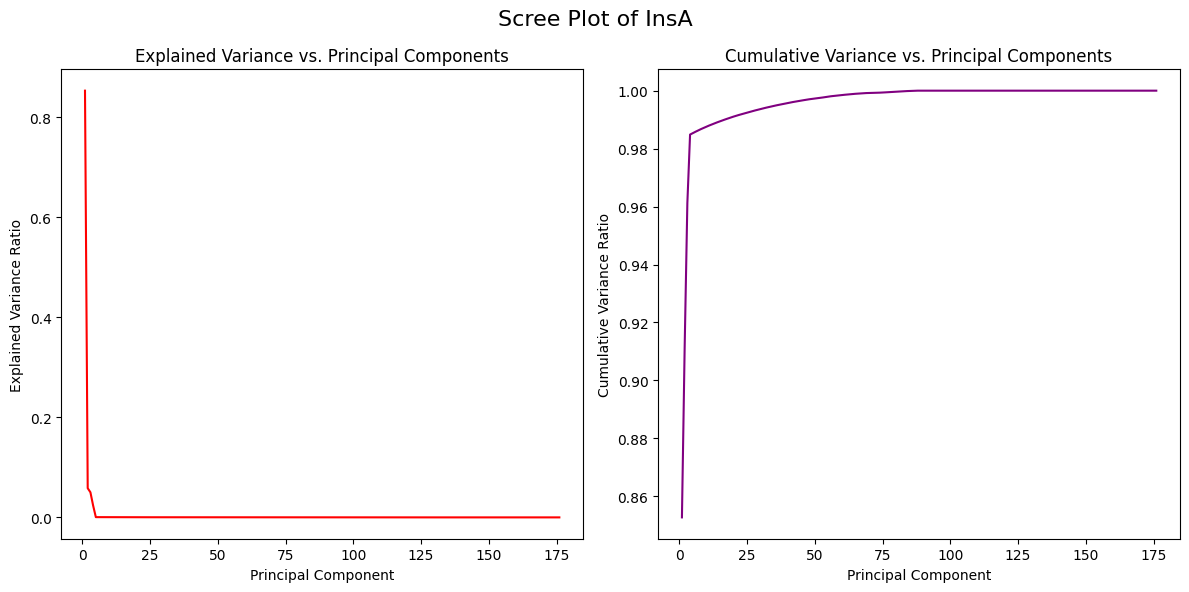

Number of components selected: 2


In [89]:
dataA = pd.read_csv('/content/drive/MyDrive/sem 7/ID5055/Assignment 1/Problem 5/InsA.csv')

# Centering the data
mean = np.mean(dataA, axis=0)
scaled_data = dataA - mean

# Getting the principle components
pca = scaled_data@get_pc(scaled_data)

# Scree plot to visualize explained variance by each principal component
explained_variance = exp_var(pca)
cumulative_variance = np.cumsum(explained_variance)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Explained Variance vs. Principal Components
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, color='red')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance vs. Principal Components')

# Subplot 2: Cumulative Variance vs. Principal Components
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='purple')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Cumulative Variance Ratio')
ax2.set_title('Cumulative Variance vs. Principal Components')

fig.suptitle('Scree Plot of InsA', fontsize=16)
plt.tight_layout()
plt.show()

# Implementing the "knee" point detection algorithm
total_variance = np.sum(explained_variance)
knee_threshold = 0.9  # adjustable

num_components = np.argmax(cumulative_variance >= knee_threshold * total_variance) + 1

print(f"Number of components selected: {num_components}")

##### InsB Analysis

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


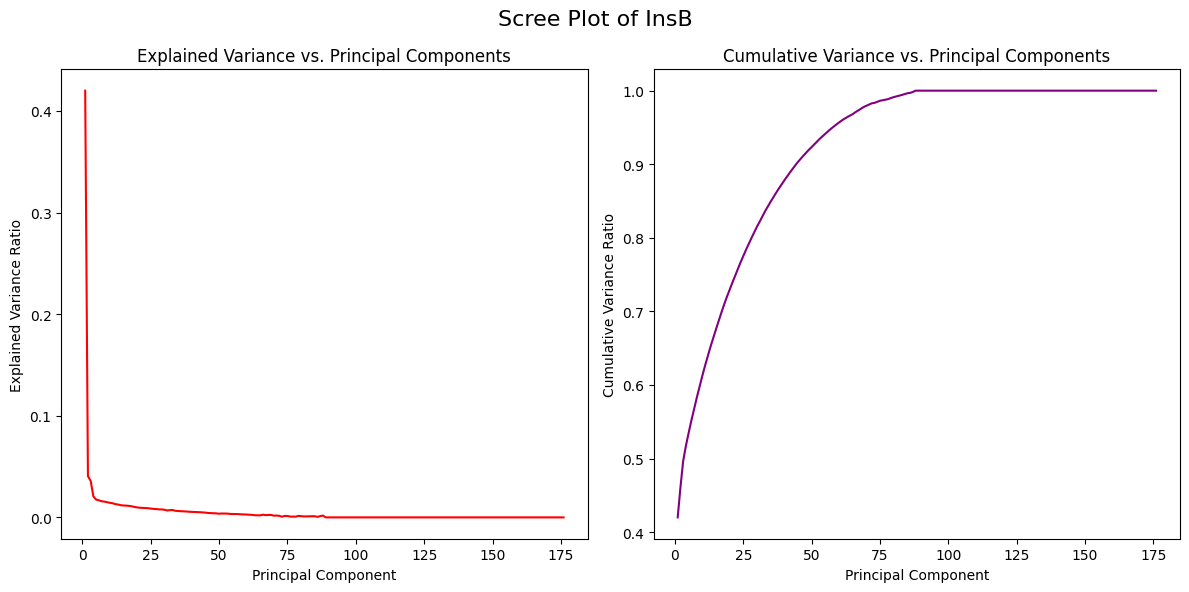

Number of components selected: 45


In [90]:
dataB = pd.read_csv('/content/drive/MyDrive/sem 7/ID5055/Assignment 1/Problem 5/InsB.csv')

# Centering the data
mean = np.mean(dataB, axis=0)
scaled_data = dataB - mean

# Getting the principle components
pca = scaled_data@get_pc(scaled_data)

# Scree plot to visualize explained variance by each principal component
explained_variance = exp_var(pca)
cumulative_variance = np.cumsum(explained_variance)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Explained Variance vs. Principal Components
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, color='red')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance vs. Principal Components')

# Subplot 2: Cumulative Variance vs. Principal Components
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='purple')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Cumulative Variance Ratio')
ax2.set_title('Cumulative Variance vs. Principal Components')

fig.suptitle('Scree Plot of InsB', fontsize=16)
plt.tight_layout()
plt.show()

# Implementing the "knee" point detection algorithm
total_variance = np.sum(explained_variance)
knee_threshold = 0.9  # adjustable

num_components = np.argmax(cumulative_variance >= knee_threshold * total_variance) + 1

print(f"Number of components selected: {num_components}")

##### InsC Analysis

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


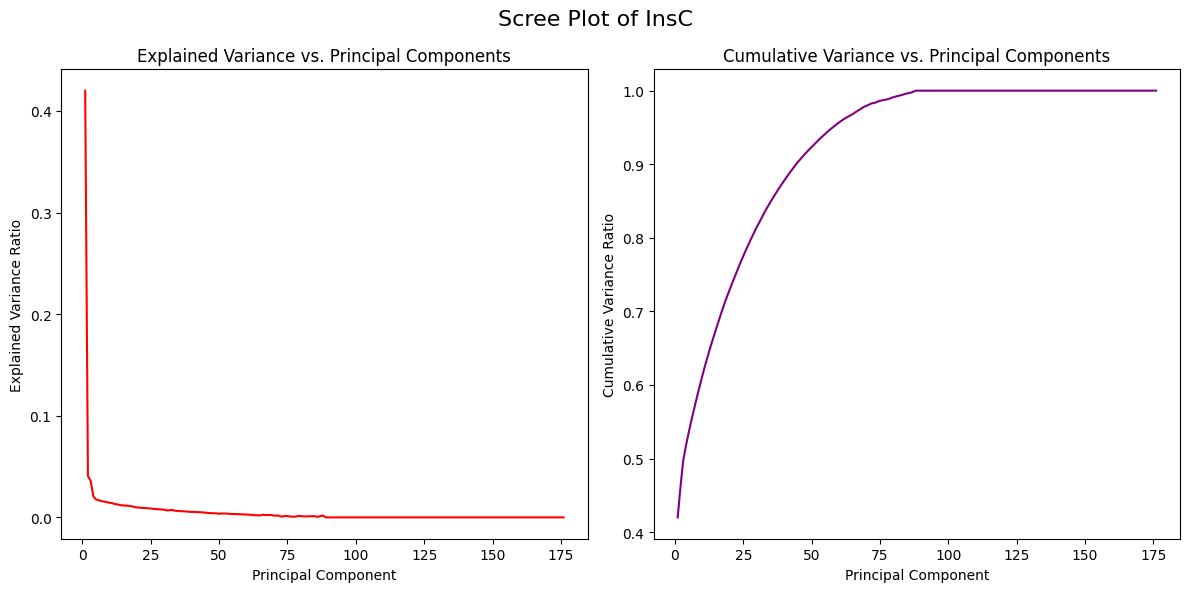

Number of components selected: 45


In [91]:
dataC = pd.read_csv('/content/drive/MyDrive/sem 7/ID5055/Assignment 1/Problem 5/InsC.csv')

# Centering the data
mean = np.mean(dataC, axis=0)
scaled_data = dataC - mean

# Getting the principle components
pca = scaled_data@get_pc(scaled_data)

# Scree plot to visualize explained variance by each principal component
explained_variance = exp_var(pca)
cumulative_variance = np.cumsum(explained_variance)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Explained Variance vs. Principal Components
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, color='red')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance vs. Principal Components')

# Subplot 2: Cumulative Variance vs. Principal Components
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='purple')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Cumulative Variance Ratio')
ax2.set_title('Cumulative Variance vs. Principal Components')

fig.suptitle('Scree Plot of InsC', fontsize=16)
plt.tight_layout()
plt.show()

# Implementing the "knee" point detection algorithm
total_variance = np.sum(explained_variance)
knee_threshold = 0.9  # adjustable

num_components = np.argmax(cumulative_variance >= knee_threshold * total_variance) + 1

print(f"Number of components selected: {num_components}")

#### Part (b)



In [92]:
# Load the new test data
test_data = pd.read_csv('/content/drive/MyDrive/sem 7/ID5055/Assignment 1/Problem 5/Test_data.csv')

mean = np.mean(test_data, axis=0)
test_data_centered = test_data - mean

# Perform PCA on the test data using the same PCA object
pca = get_pc(test_data_centered)[:, :9]
# Using the rule of thumb I opted to use first 9 principle components

transformed_data = test_data_centered @ pca
reconstructed_data = np.dot(transformed_data, pca.T)
reconstructed_data = reconstructed_data + mean.values

# Calculate the reconstruction error for each test sample
reconstruction_errors = np.mean(np.square(test_data - reconstructed_data), axis=1)

# Identify the contaminated sample
contaminated_sample_index = np.argmax(reconstruction_errors)
print(f"The contaminated sample is at index: {contaminated_sample_index}")

The contaminated sample is at index: 3


The contaminated sample might have higher residuals compared to the rest of the samples. So I looked for samples with significantly larger residuals than the others. This could be indicative of the sample with contaminants and it turned out that sample at index 3 has the highest residual.